In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

In [2]:
xlsx = pd.ExcelFile('FracStats_JobList_Summer2017.xlsx')
df_stats = xlsx.parse('FracStats')

In [3]:
df_stats.head()

,Well,Formation,Basing,System,Fluid Type,Lateral [ft],TVD [ft],MD [ft],Stage [count],Screen Out,...,Phasing [deg],Perf Diameter [in],Perfs Open [count],Cluster Spacing [ft],Stage Spacing [ft],Perfs [area],Ball Size [in],Rate at Shift [bpm],Stage Length [ft],Well Section
0,P2,Niobrara,Denver-Julesburg,Sliding Sleeve,Gel,7104.0,6648.0,14124.0,1.0,No,...,NaN,NaN,NaN,NaN,TS,NaN,1.095,9.6,TS,Toe
1,P2,Niobrara,Denver-Julesburg,Sliding Sleeve,Gel,7104.0,6648.0,14124.0,2.0,No,...,NaN,NaN,NaN,NaN,193,NaN,1.15,11.9,193.52,Toe
2,P2,Niobrara,Denver-Julesburg,Sliding Sleeve,Gel,7104.0,6648.0,14124.0,3.0,No,...,NaN,NaN,NaN,NaN,197,NaN,1.205,11.9,196.87,Toe
3,P2,Niobrara,Denver-Julesburg,Sliding Sleeve,Gel,7104.0,6648.0,14124.0,4.0,No,...,NaN,NaN,NaN,NaN,197,NaN,1.26,11.9,197,Toe
4,P2,Niobrara,Denver-Julesburg,Sliding Sleeve,Gel,7104.0,6648.0,14124.0,5.0,No,...,NaN,NaN,NaN,NaN,197,NaN,1.315,11.8,196.77,Toe


In [4]:
df_stats['Screen Out'].value_counts()

No         1024
Cut          28
Skipped      12
Yes           6
Name: Screen Out, dtype: int64

Let's narrow our data down to successful stages.

In [5]:
success_df = df_stats.loc[df_stats['Screen Out'] == 'No']

Check our different values for Formation.

In [6]:
success_df['Formation'].unique()

array(['Niobrara', 'Codell', 'Wolfcamp', 'Wolfcamp '], dtype=object)

Let's rename 'Wofcamp ' to 'Wolfcamp'.

In [7]:
success_df['Formation'].replace({'Wolfcamp ': 'Wolfcamp'}, inplace=True)

/Users/ky/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


And our stage count by Formation.

In [8]:
success_df['Formation'].value_counts()

Niobrara    542
Wolfcamp    300
Codell      182
Name: Formation, dtype: int64

Let's put together some simple box plots and then explore some bivariate relationships.

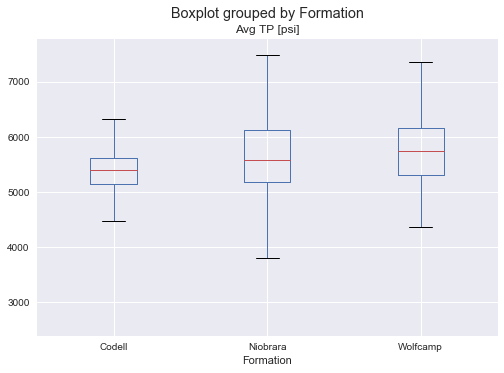

In [12]:
success_df.boxplot(column='Avg TP [psi]', by='Formation');

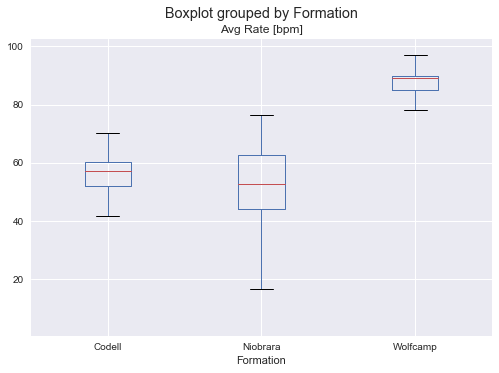

In [13]:
success_df.boxplot(column='Avg Rate [bpm]', by='Formation');

/Users/ky/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/ky/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


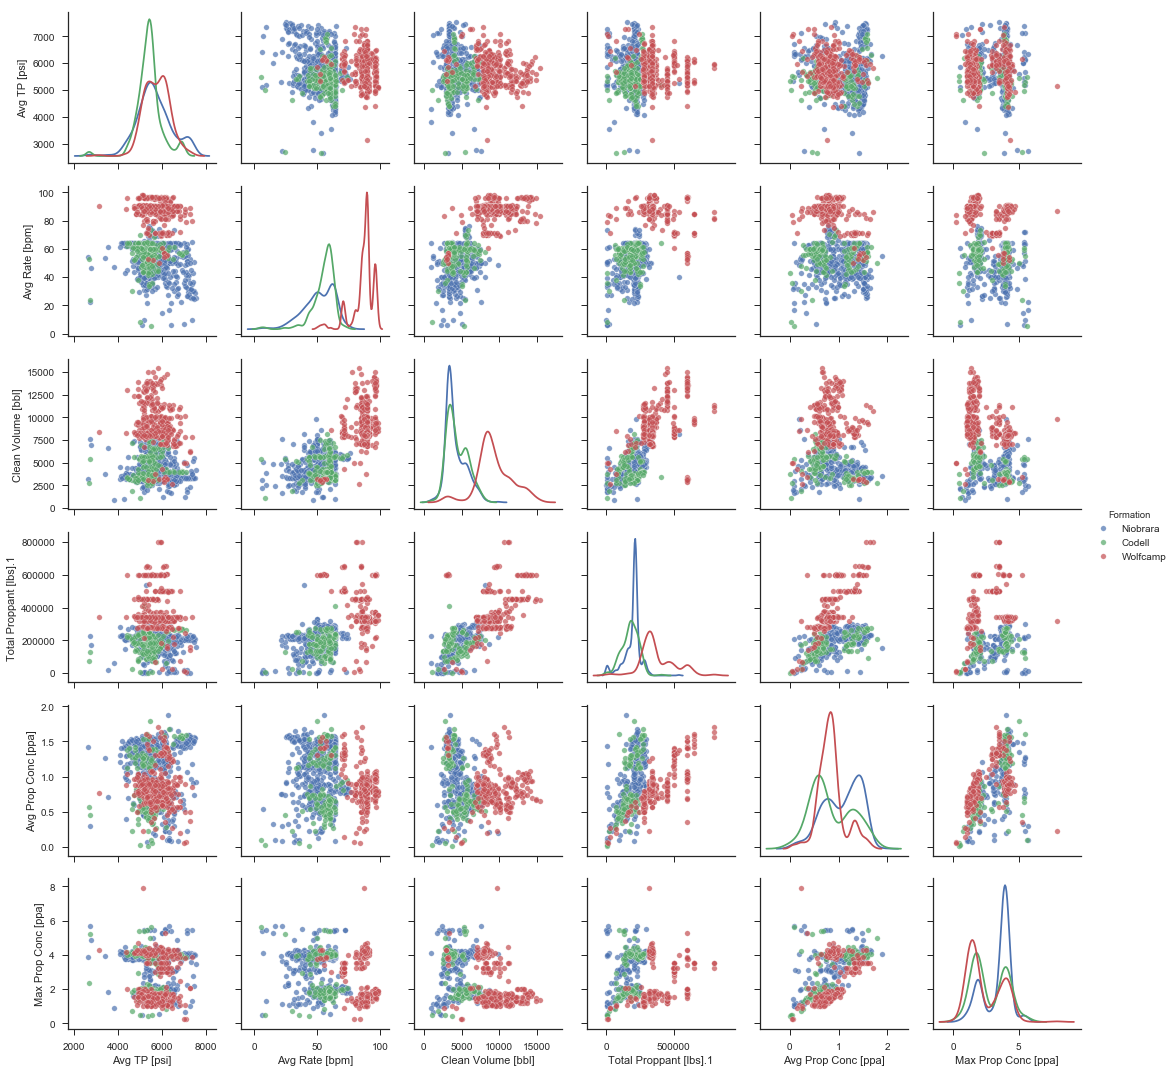

In [9]:
select_cols = ['Formation', 'Avg TP [psi]', 'Avg Rate [bpm]', 'Clean Volume [bbl]',
               'Total Proppant [lbs].1', 'Avg Prop Conc [ppa]', 'Max Prop Conc [ppa]']

sns.pairplot(success_df[select_cols], hue="Formation", diag_kind="kde", plot_kws={"s": 30, "alpha": 0.7});